In [1]:
import sys #The sys module provides information about constants, functions and methods of the Python interpreter. dir(system) gives a summary of the available constants, functions and methods.
import os #It assigns its path to the DATASET.
import argparse

import random #taking random sample from the DATASET

import time
import datetime

from collections import Counter

import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import inspect
import gc

import re

from PIL import Image
import cv2

import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, AveragePooling2D


from keras.applications.inception_v3 import InceptionV3


from keras.constraints import maxnorm

import matplotlib
from keras import optimizers
from keras.optimizers import adam_v2


from keras import backend as K
K.image_data_format()

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report


from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# Creates directory in order to store the INPUT and the OUTPUT 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

In [3]:
#Remove the unneeded directories 
def remove_directory(directory_path):

    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
        
    return True


In [4]:
#empty the directories from data
def clear_directory(directory_path):

    dirs_files = os.listdir(directory_path)
    
    for item in dirs_files:
#         item_path = os.path.join(directory_path, item)
        item_path = directory_path+ item
        
        try:
            if os.path.isfile(item_path):
                os.unlink(item_path)
            elif os.path.isdir(item_path): 
                shutil.rmtree(item_path)
        except Exception as e:
            print(e)
            
    return True

In [6]:
#Define the date time of the execution
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()  


In [7]:
#plotting parameters
def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params


In [8]:
#reset the plotting parameters
def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [9]:
# showing the barplot to present the dataset statistics(barplotting)
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)

In [10]:
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = 'training'
    subplot_no = plot_property['subplot'] 
    count_bar_plot(training_dir, plot_property)
    
    plot_property['title'] = "Validation"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = "testing"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    plt.savefig(figure_directory+"/data_distribution.png", bbox_inches='tight')
    plt.savefig(figure_directory+"/data_distribution.pdf", bbox_inches='tight')
    plt.show()

In [11]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    if model:
        try:
            del model
        except:
            return False
    
    tf.reset_default_graph()
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks (freeing up the memory)
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint = None
    reduce_lr = None
    early_stopping = None
    tensorboard = None

In [12]:
import matplotlib.pyplot as plt


In [13]:
import seaborn as sns


In [14]:
from sklearn.metrics import classification_report,confusion_matrix


In [15]:
import numpy as np


In [16]:
labels = ['COVID-19', 'NORMAL'] #the data will be calssified into covid-19 xray pics and normal pics


In [17]:
img_size = 224


In [18]:
#get the data from the directory(traing data ,validation data , testing data)
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [19]:
#helps to get define the right path
import os
os.chdir(r'C:\\\Users\\\anoue\\\Desktop')

In [20]:
train = get_data(r'C:\\\Users\\\anoue\\\Desktop')


C:\Users\anoue\AppData\Local\Temp/ipykernel_14716/1967755769.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [21]:
val = get_data(r'C:\\\Users\\\anoue\\\Documents')


C:\Users\anoue\AppData\Local\Temp/ipykernel_14716/1967755769.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [25]:
#calculate the number of of covid xray data and normal xray data
l = []
for i in train:
    if(i[1] == 0):
        l.append("COVID-19")
    else
        l.append("NORMAL")
sns.set_style('darkgrid')
sns.countplot(l)

SyntaxError: invalid syntax (Temp/ipykernel_9608/1514800318.py, line 5)

Text(0.5, 1.0, 'COVID-19')

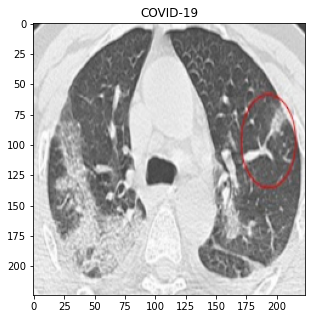

In [22]:
#plot random pics from xray covid pics
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'NORMAL')

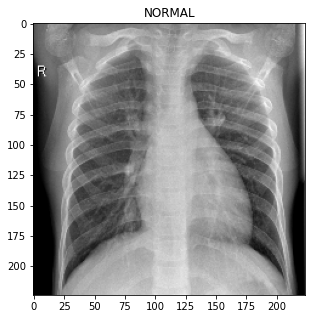

In [23]:
#plot random pic from the xray normal pics
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [24]:
#preparing data to be trainned
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [25]:
#image data generation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [26]:
#defining the model
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [28]:
#compiler le model
model.compile(optimizer="sgd", loss="mean_squared_error")


In [30]:
history= model.fit(x_train,y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20
5/5 [==============================] - 88s 20s/step - loss: 0.2504 - val_loss: 0.2500
Epoch 2/20
5/5 [==============================] - 73s 14s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 3/20
5/5 [==============================] - 49s 10s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 4/20
5/5 [==============================] - 49s 10s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 5/20
5/5 [==============================] - 54s 11s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 6/20
5/5 [==============================] - 555s 136s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 7/20
5/5 [==============================] - 49s 10s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 8/20
5/5 [==============================] - 49s 10s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 9/20
5/5 [==============================] - 63s 13s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 10/20
5/5 [==============================] - 242s 28s/step - loss: 0.2503 - val_loss: 0.2500
Epoch 11/20
5/5 [=========

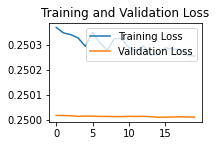

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
predictions = model.predict(x_val)


In [89]:
np.reshape(predictions,(1,-1))

array([[0.4954519 , 0.5045481 , 0.498199  , ..., 0.50027007, 0.49565768,
        0.50434226]], dtype=float32)

In [90]:
print(np.reshape(predictions,(1,-1)))

[[0.4954519  0.5045481  0.498199   ... 0.50027007 0.49565768 0.50434226]]


In [91]:
predictions = np.reshape(predictions,(1,-1))

In [92]:
predictions = np.transpose(predictions)

In [93]:
print(predictions)

[[0.4954519 ]
 [0.5045481 ]
 [0.498199  ]
 ...
 [0.50027007]
 [0.49565768]
 [0.50434226]]


In [103]:
print(classification_report(y_val, predictions, target_names = ['COVID-19 (Class 0)','NORMAL' (Class 1)']))


SyntaxError: invalid syntax (Temp/ipykernel_14716/4044863935.py, line 1)